In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.style as style

In [2]:
path='sales.csv'
df=pd.read_csv(path)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
df.mean()

User_ID               1.003029e+06
Occupation            8.079300e+00
Marital_Status        4.097774e-01
Product_Category_1    5.366196e+00
Product_Category_2    9.844506e+00
Product_Category_3    1.266860e+01
Purchase              9.263969e+03
dtype: float64

In [14]:
df1 = df.fillna(df.mean())

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    783667 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [16]:
df2 = df1.drop(['User_ID','Product_ID'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.8+ MB


In [17]:
# df2['Age']=(df2['Age'].str.strip('+'))
df2['Stay_In_Current_City_Years']=(df2['Stay_In_Current_City_Years'].str.strip('+').astype('float'))


In [19]:
df2['Gender'] = df2['Gender'].astype('category')
df2['Age'] = df2['Age'].astype('category')
df2['City_Category'] = df2['City_Category'].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Gender                      783667 non-null  category
 1   Age                         783667 non-null  category
 2   Occupation                  783667 non-null  int64   
 3   City_Category               783667 non-null  category
 4   Stay_In_Current_City_Years  783667 non-null  float64 
 5   Marital_Status              783667 non-null  int64   
 6   Product_Category_1          783667 non-null  int64   
 7   Product_Category_2          783667 non-null  float64 
 8   Product_Category_3          783667 non-null  float64 
 9   Purchase                    783667 non-null  float64 
dtypes: category(3), float64(4), int64(3)
memory usage: 44.1 MB


In [20]:
cat_columns = df2.select_dtypes(['category']).columns
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes)
df2

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2.0,0,3,9.844506,12.668605,8370.000000
1,0,0,10,0,2.0,0,1,6.000000,14.000000,15200.000000
2,0,0,10,0,2.0,0,12,9.844506,12.668605,1422.000000
3,0,0,10,0,2.0,0,12,14.000000,12.668605,1057.000000
4,1,6,16,2,4.0,0,8,9.844506,12.668605,7969.000000
...,...,...,...,...,...,...,...,...,...,...
783662,0,2,15,1,4.0,1,8,9.844506,12.668605,9263.968713
783663,0,2,15,1,4.0,1,5,8.000000,12.668605,9263.968713
783664,0,2,15,1,4.0,1,1,5.000000,12.000000,9263.968713
783665,0,4,1,2,4.0,0,10,16.000000,12.668605,9263.968713


In [24]:
dfa = df2[df2.City_Category != 1]
dfa = dfa[dfa.City_Category != 2]
dfa

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2.0,0,3,9.844506,12.668605,8370.000000
1,0,0,10,0,2.0,0,1,6.000000,14.000000,15200.000000
2,0,0,10,0,2.0,0,12,9.844506,12.668605,1422.000000
3,0,0,10,0,2.0,0,12,14.000000,12.668605,1057.000000
5,1,2,15,0,3.0,0,1,2.000000,12.668605,15227.000000
...,...,...,...,...,...,...,...,...,...,...
783615,0,2,7,0,1.0,0,1,6.000000,8.000000,9263.968713
783620,0,4,0,0,3.0,0,11,16.000000,12.668605,9263.968713
783639,0,2,7,0,0.0,1,16,9.844506,12.668605,9263.968713
783655,1,1,4,0,4.0,0,1,16.000000,12.668605,9263.968713


In [25]:
dfb = df2[df2.City_Category != 0]
dfb = dfb[dfb.City_Category != 2]
dfb

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
6,1,4,7,1,2.0,1,1,8.000000,17.000000,19215.000000
7,1,4,7,1,2.0,1,1,15.000000,12.668605,15854.000000
8,1,4,7,1,2.0,1,1,16.000000,12.668605,15686.000000
18,1,3,1,1,1.0,1,1,14.000000,16.000000,11788.000000
29,0,3,1,1,4.0,1,2,4.000000,8.000000,16352.000000
...,...,...,...,...,...,...,...,...,...,...
783661,0,2,15,1,4.0,1,8,9.844506,12.668605,9263.968713
783662,0,2,15,1,4.0,1,8,9.844506,12.668605,9263.968713
783663,0,2,15,1,4.0,1,5,8.000000,12.668605,9263.968713
783664,0,2,15,1,4.0,1,1,5.000000,12.000000,9263.968713


In [26]:
dfc = df2[df2.City_Category != 0]
dfc = dfc[dfc.City_Category != 1]
dfc

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1,6,16,2,4.0,0,8,9.844506,12.668605,7969.000000
19,1,2,12,2,4.0,1,1,5.000000,15.000000,19614.000000
20,1,2,12,2,4.0,1,5,14.000000,12.668605,8584.000000
21,1,2,12,2,4.0,1,8,9.844506,12.668605,9872.000000
22,1,2,12,2,4.0,1,8,9.844506,12.668605,9743.000000
...,...,...,...,...,...,...,...,...,...,...
783654,1,3,6,2,1.0,1,1,2.000000,8.000000,9263.968713
783656,1,2,17,2,1.0,1,6,8.000000,15.000000,9263.968713
783657,1,2,17,2,1.0,1,2,15.000000,12.668605,9263.968713
783660,0,2,1,2,3.0,0,6,8.000000,12.668605,9263.968713


In [45]:
dfa = dfa.drop("City_Category", axis = 1)
dfb = dfb.drop("City_Category", axis = 1)
dfc = dfc.drop("City_Category", axis = 1)
dfa

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2.0,0,3,9.844506,12.668605,8370.000000
1,0,0,10,2.0,0,1,6.000000,14.000000,15200.000000
2,0,0,10,2.0,0,12,9.844506,12.668605,1422.000000
3,0,0,10,2.0,0,12,14.000000,12.668605,1057.000000
5,1,2,15,3.0,0,1,2.000000,12.668605,15227.000000
...,...,...,...,...,...,...,...,...,...
783615,0,2,7,1.0,0,1,6.000000,8.000000,9263.968713
783620,0,4,0,3.0,0,11,16.000000,12.668605,9263.968713
783639,0,2,7,0.0,1,16,9.844506,12.668605,9263.968713
783655,1,1,4,4.0,0,1,16.000000,12.668605,9263.968713


In [46]:
dfa.to_csv('citya.csv', index=False)
dfb.to_csv('cityb.csv', index=False)
dfc.to_csv('cityc.csv', index=False)

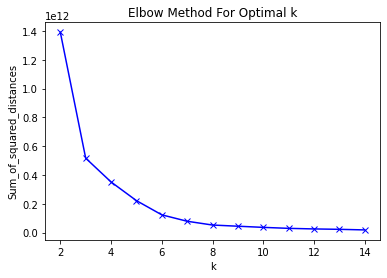

In [48]:
# cluster analysis
X = dfa
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

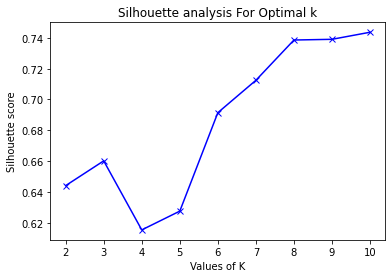

In [49]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(dfa)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(dfa, cluster_labels))
 # silhouette score
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [50]:
range_n_clusters = [3,]
type(range_n_clusters)

list

For n_clusters = 3 The average silhouette_score is : 0.6601718723392802


TypeError: '(slice(None, None, None), 0)' is an invalid key

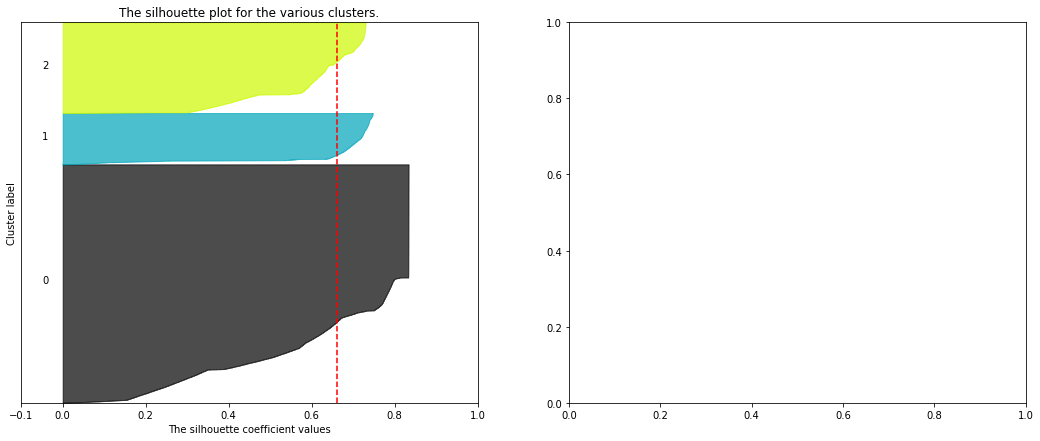

In [51]:
# range_n_clusters = [2,3,4,5,6,7,8,9,10]
range_n_clusters = [3,]
silhouette_avg_n_clusters = []
X = dfa

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.6601422441254048


TypeError: '(slice(None, None, None), 0)' is an invalid key

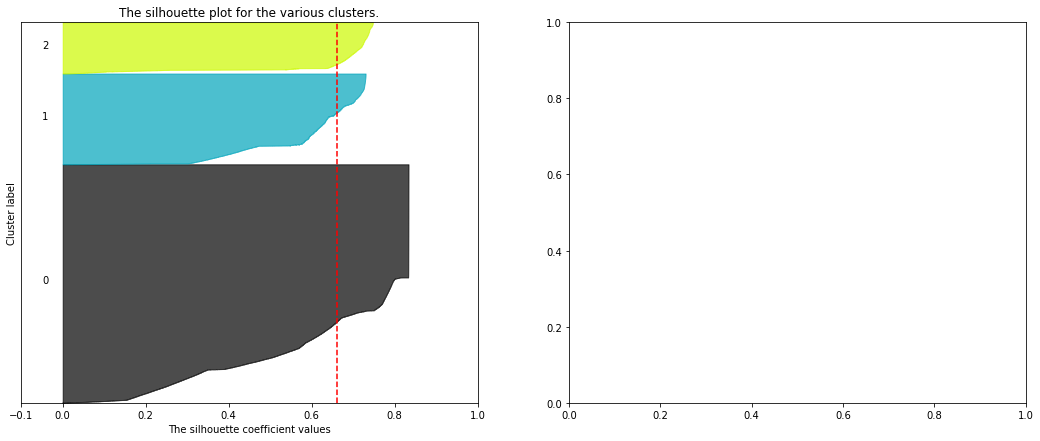

In [52]:
range_n_clusters = [3,]
X = dfa

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()